<a href="https://colab.research.google.com/github/JoodAlk/IT326-DataMiningProject/blob/main/Data_Mining_Project_Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phase 1:

The goal of collecting this dataset :

The goal is to explore how AI and automation are influencing employment across different industries by using two main approaches. First, classification techniques will be employed to group job roles based on their level of AI adoption (e.g., low, medium, high), helping to reveal trends in which types of jobs are embracing AI the most. Second, clustering methods will assess automation risks across industries, identifying sectors most vulnerable to automation. By analyzing the automation risk across sectors, the study will highlight which industries are more prone to job displacement due to automation, as well as which ones are more resilient.

This analysis, using 500 job listings, will also examine the impact on salaries, required skills, and job growth projections, providing a well-rounded view of the future job market.

The class label in this dataset is the 'Job_Growth_Projection', which categorizes job roles as either experiencing "Growth" or "Decline" or "Stable". This label represents the expected future trend for each job role and industry, allowing us to analyze which roles are likely to expand or shrink in the coming years.

The source: kaggle link (https://www.kaggle.com/datasets/uom190346a/ai-powered-job-market-insights)


In [35]:
import pandas as pd

file_path = '/content/ai_job_market_insights.csv'

df = pd.read_csv(file_path)
num_attributes = df.shape[1]

attribute_types = df.dtypes

num_objects = df.shape[0]

class_label_name = df.columns[-1]

print(f"Number of attributes: {num_attributes}")
print(f"Type of attributes:\n{attribute_types}")
print(f"Number of objects: {num_objects}")
print(f"Class or label name: {class_label_name}")

print("First 5 lines:")
print(df.head())

print("\nLast 5 lines:")
print(df.tail())

Number of attributes: 10
Type of attributes:
Job_Title                 object
Industry                  object
Company_Size              object
Location                  object
AI_Adoption_Level         object
Automation_Risk           object
Required_Skills           object
Salary_USD               float64
Remote_Friendly           object
Job_Growth_Projection     object
dtype: object
Number of objects: 500
Class or label name: Job_Growth_Projection
First 5 lines:
               Job_Title       Industry Company_Size   Location  \
0  Cybersecurity Analyst  Entertainment        Small      Dubai   
1   Marketing Specialist     Technology        Large  Singapore   
2          AI Researcher     Technology        Large  Singapore   
3          Sales Manager         Retail        Small     Berlin   
4  Cybersecurity Analyst  Entertainment        Small      Tokyo   

  AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0            Medium            High        UX/UI Desi

Phase 2:

**A. Understanding our dataset: A summary**

samples of raw dataset:
                 Job_Title            Industry Company_Size   Location  \
0    Cybersecurity Analyst       Entertainment        Small      Dubai   
1     Marketing Specialist          Technology        Large  Singapore   
2            AI Researcher          Technology        Large  Singapore   
3            Sales Manager              Retail        Small     Berlin   
4    Cybersecurity Analyst       Entertainment        Small      Tokyo   
..                     ...                 ...          ...        ...   
495         Data Scientist  Telecommunications       Medium     Berlin   
496  Cybersecurity Analyst  Telecommunications        Small     London   
497  Cybersecurity Analyst              Energy        Large      Dubai   
498     Operations Manager          Healthcare        Large      Paris   
499             HR Manager       Entertainment       Medium     Berlin   

    AI_Adoption_Level Automation_Risk     Required_Skills     Salary_USD  \
0          

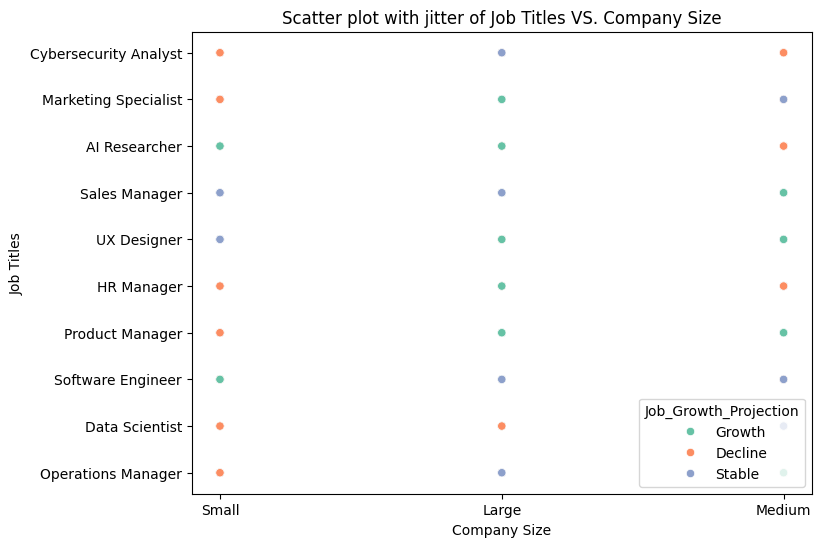

<Figure size 640x480 with 0 Axes>

In [36]:

import matplotlib.pyplot as plt
import seaborn as sns

# 1. samples of raw dataset
df1=pd.DataFrame(df)
print("samples of raw dataset:")
print (df1)

#tables,graphs:(1-varibles distributin 2-missing values 3-statistical summaries)
#2:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#Scatter plot of Job Titles VS. Company Size
plt.figure(figsize=(8,6))
sns.scatterplot(x='Company_Size', y='Job_Title', data=df, hue='Job_Growth_Projection',palette='Set2')
plt.title('Scatter plot with jitter of Job Titles VS. Company Size')
plt.xlabel('Company Size')
plt.ylabel ('Job Titles')
plt.show()
plt.subplots_adjust(hspace=0.5)



This scatter plot shows the distribution of Job Titles across Company Sizes (Small, Medium, Large) with points colored by Job Growth Projection (Growth, Decline, Stable). The jitter effect helps distinguish overlapping points


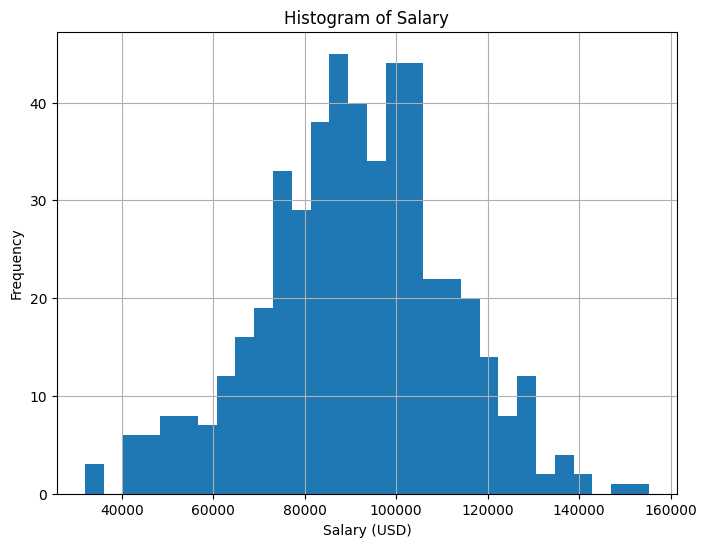

In [37]:

# Histogram for 'Salary_USD'
plt.figure(figsize=(8,6))
df['Salary_USD'].hist(bins=30)
plt.title('Histogram of Salary')
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.show()


This histogram visualizes the distribution of Salaries (USD), showing how frequently different salary ranges occur in the dataset. The x-axis represents salary amounts, and the y-axis shows the frequency of those amounts.


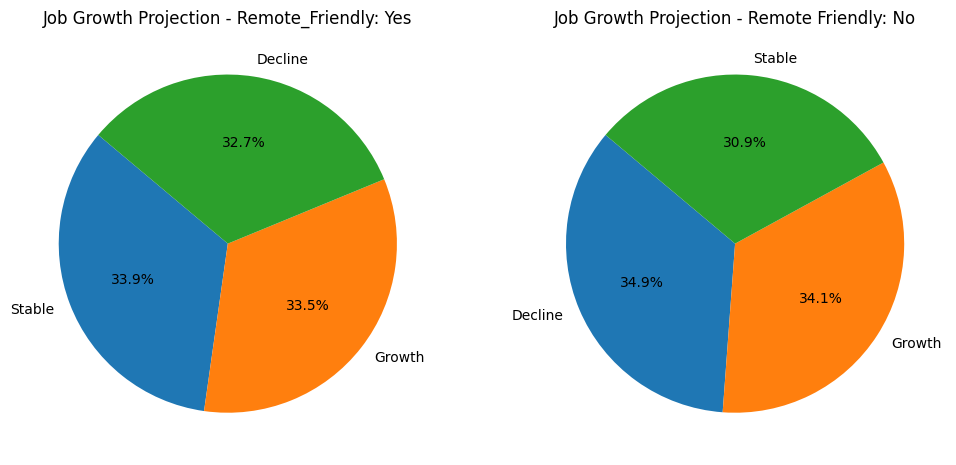

In [38]:
#pie chart Remote Friendly
yes_counts = df[df['Remote_Friendly'] == 'Yes']['Job_Growth_Projection'].value_counts()
no_counts = df[df['Remote_Friendly'] == 'No']['Job_Growth_Projection'].value_counts()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(yes_counts, labels=yes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Growth Projection - Remote_Friendly: Yes')

plt.subplot(1, 2, 2)
plt.pie(no_counts, labels=no_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Job Growth Projection - Remote Friendly: No')
plt.subplots_adjust(hspace=0.5)

plt.show()


This figure presents two pie charts comparing the **Job Growth Projection** for **Remote-Friendly** and **Non-Remote-Friendly** job roles. Each pie chart shows the distribution of job roles categorized as **Growth**, **Decline**, and **Stable**. The left chart represents remote-friendly jobs, while the right chart represents non-remote-friendly jobs. Percentages indicate how each category is distributed within these two groups.

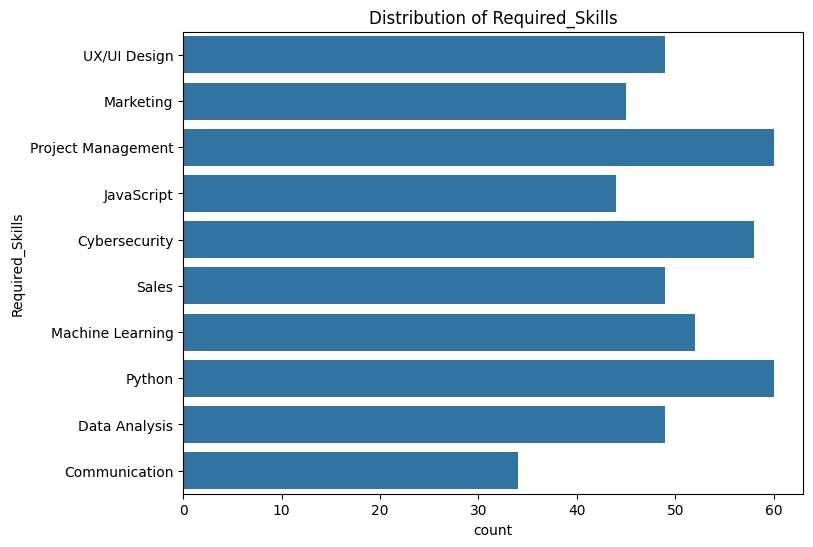

<Figure size 640x480 with 0 Axes>

In [39]:

#bar chart Required_Skills
plt.figure(figsize=(8,6))
sns.countplot(y='Required_Skills',data=df)
plt.title('Distribution of Required_Skills')
plt.show()

plt.subplots_adjust(hspace=0.5)

This horizontal bar chart shows the Distribution of Required Skills, with the x-axis representing the count of occurrences of each skill, and the y-axis listing the required skills in the dataset. It highlights how frequently each skill appears.

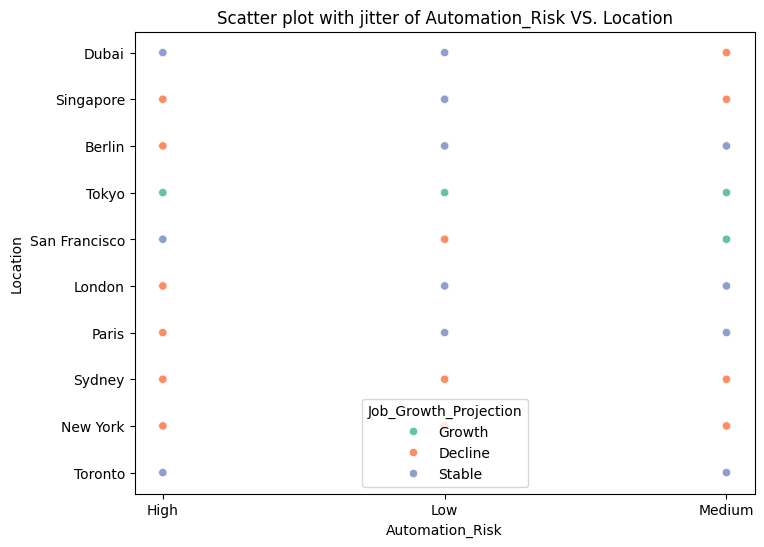

<Figure size 640x480 with 0 Axes>

In [40]:

#Scatter plot with jitter of Location VS. Automation_Risk
plt.figure(figsize=(8,6))
sns.scatterplot(x='Automation_Risk', y='Location', data=df, hue='Job_Growth_Projection',palette='Set2')
plt.title('Scatter plot with jitter of Automation_Risk VS. Location')
plt.ylabel('Location')
plt.xlabel ('Automation_Risk')
plt.show()

plt.subplots_adjust(hspace=0.5)


This scatter plot shows the relationship between **Automation Risk** and **Location**, with points colored by **Job Growth Projection** (Growth, Decline, Stable). The x-axis represents automation risk, and the y-axis shows different locations.

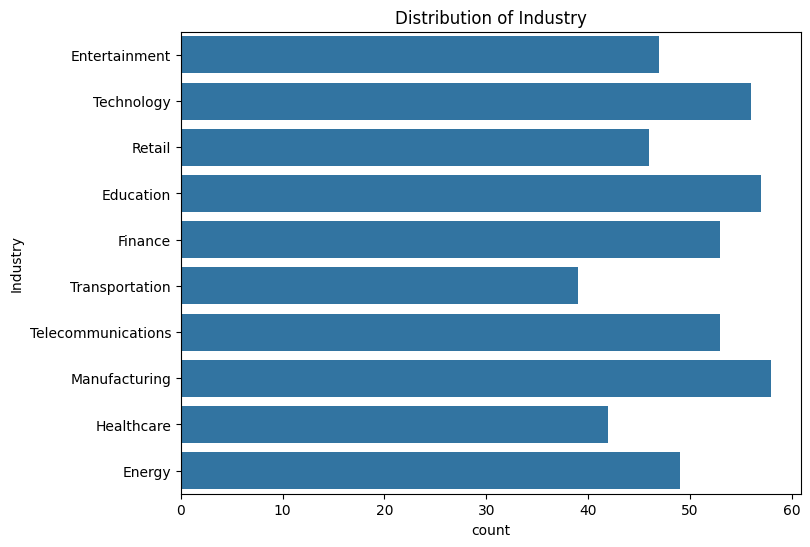

<Figure size 640x480 with 0 Axes>

In [41]:

#bar chart Industry
plt.figure(figsize=(8,6))
sns.countplot(y='Industry',data=df)
plt.title('Distribution of Industry')
plt.show()

plt.subplots_adjust(hspace=0.5)

This horizontal bar chart shows the Distribution of Industry, with the x-axis representing the count of occurrences and the y-axis listing different industries. It highlights how frequently each industry appears in the dataset.

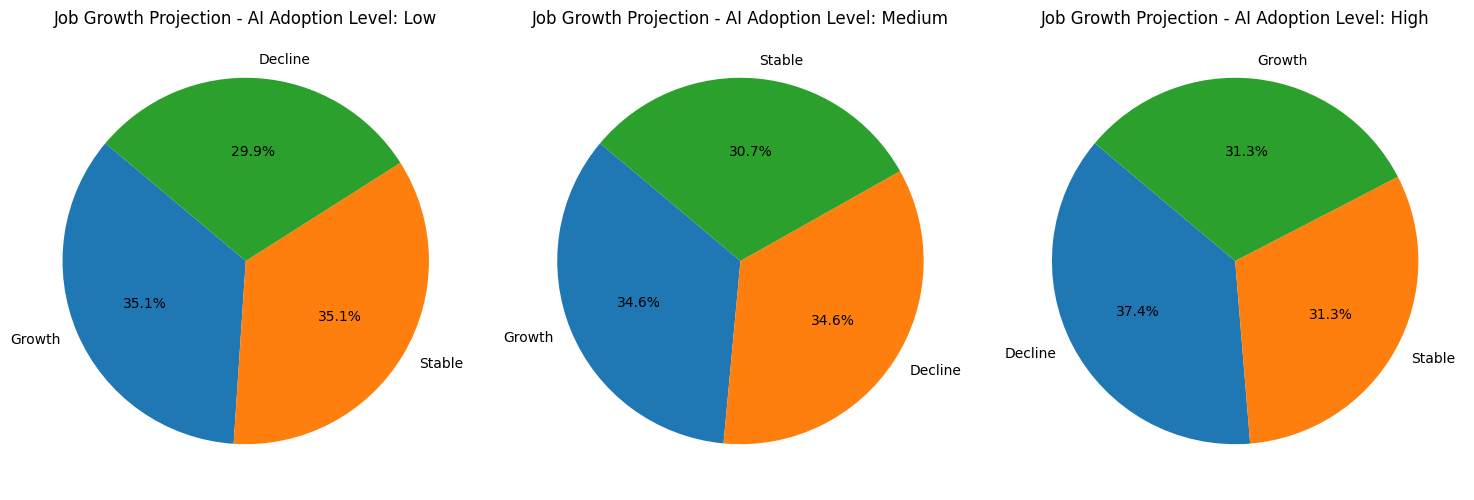

In [42]:
#pie chart Ai_adoption_level
levels = ['Low', 'Medium', 'High']
job_growth_counts = {level: df[df['AI_Adoption_Level'] == level]['Job_Growth_Projection'].value_counts() for level in levels}

plt.figure(figsize=(15, 5))

for i, level in enumerate(levels):
    if level in job_growth_counts:
        plt.subplot(1, 3, i + 1)
        plt.pie(job_growth_counts[level], labels=job_growth_counts[level].index, autopct='%1.1f%%', startangle=140)
        plt.title(f'Job Growth Projection - AI Adoption Level: {level}')
    else:
        print(f"No data for {level}")

plt.tight_layout()
plt.show()


This figure presents three pie charts showing the Job Growth Projection categorized by AI Adoption Level (Low, Medium, High). Each chart displays the proportion of job roles projected to experience Growth, Decline, or remain Stable for different levels of AI adoption. The percentages indicate the distribution of job growth projections within each AI adoption category.

In [43]:
#-------------------------

# 3. Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# 4. Statistical Summary (Mean, Variance, etc.)
print("\nStatistical Summary:")
print(df.describe())

print("\nThe variance:")
var_data=df["Salary_USD"].var()
print(var_data)


Missing values in each column:
Job_Title                0
Industry                 0
Company_Size             0
Location                 0
AI_Adoption_Level        0
Automation_Risk          0
Required_Skills          0
Salary_USD               0
Remote_Friendly          0
Job_Growth_Projection    0
dtype: int64

Statistical Summary:
          Salary_USD
count     500.000000
mean    91222.390974
std     20504.291453
min     31969.526346
25%     78511.514863
50%     91998.195286
75%    103971.282092
max    155209.821614

The variance:
420425968.00916165


This output provides a **missing values check** and a **statistical summary** of the **Salary_USD** column. There are no missing values in the dataset, as indicated by the zero counts in each column. The statistical summary includes descriptive statistics such as count, mean, standard deviation, min, max, and quartile values for the salary data. Additionally, the variance of the **Salary_USD** column is shown.



---



**B. The application of preprocessing techniques**

In [44]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data = pd.read_csv('/content/ai_job_market_insights.csv')
df=pd.DataFrame(data)


detect outliners

In [45]:


#In our project analyzing how AI and automation impact employment, we used outlier detection to improve data accuracy

outlier_threshold = 1.5

def count_outliers(column_data):
    q1 = np.percentile(column_data, 25)
    q3 = np.percentile(column_data, 75)
    iqr = q3 - q1
    upper_bound = q3 + outlier_threshold * iqr
    lower_bound = q1 - outlier_threshold * iqr
    outliers = (column_data > upper_bound) | (column_data < lower_bound)
    return sum(outliers)

numeric_columns = data.select_dtypes(include=[np.number]).columns

outlier_counts = {}
total_rows_with_outliers = 0

for column in numeric_columns:
    outliers = count_outliers(data[column])
    outlier_counts[column] = outliers
    total_rows_with_outliers += outliers

total_rows = len(data)

print("Outlier Counts:")
for column, count in outlier_counts.items():
    print(f"{column}: {count} rows with outliers")

print(f"Total Rows with Outliers: {total_rows_with_outliers}")




Outlier Counts:
Salary_USD: 5 rows with outliers
Total Rows with Outliers: 5


We focused on numeric columns, like salaries, calculating the first (Q1)
and third quartiles (Q3) to find the interquartile range (IQR).
We set outlier boundaries at Q3 + 1.5 * IQR (upper) and Q1 - 1.5 * IQR
(lower) and counted the outliers in each numeric column. This process
helps clean the data, ensuring clearer insights into averages like
salaries and enhances the performance of any future machine learning
models. Ultimately, detecting outliers allows us to better understand
trends in the job market influenced by AI and automation.

Removing Outliners

In [46]:

# Calculate the IQR (Interquartile Range)
Q1 = data['Salary_USD'].quantile(0.25) # Calculate the first quartile (25th percentile)
Q3 = data['Salary_USD'].quantile(0.75) # Calculate the third quartile (75th percentile)
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
cleaned_data = data[(data['Salary_USD'] >= lower_bound) & (data['Salary_USD'] <= upper_bound)]


# Display the removed rows to understand what was filtered out
removed_rows = data[(data['Salary_USD'] < lower_bound) | (data['Salary_USD'] > upper_bound)]
print("\nRemoved Rows (Outliers):")
print(removed_rows)



Removed Rows (Outliers):
                 Job_Title            Industry Company_Size       Location  \
182         Data Scientist      Transportation        Small       New York   
289         Data Scientist          Healthcare       Medium          Paris   
384  Cybersecurity Analyst  Telecommunications        Large         Berlin   
420   Marketing Specialist             Finance       Medium  San Francisco   
425            UX Designer       Entertainment        Small      Singapore   

    AI_Adoption_Level Automation_Risk Required_Skills     Salary_USD  \
182               Low             Low          Python   31969.526346   
289              High             Low          Python  148467.112346   
384               Low          Medium    UX/UI Design   33601.381360   
420              High            High           Sales  155209.821614   
425            Medium          Medium   Data Analysis   35963.297317   

    Remote_Friendly Job_Growth_Projection  
182             Yes         

In our analysis of salary data, we used the Interquartile Range (IQR) method
to identify and remove outliers from the Salary_USD column. First, we calculated
the first (Q1) and third quartiles (Q3) to determine the IQR, which measures
the middle 50% of the data. We defined outlier thresholds by setting the lower
bound as Q1 - 1.5 * IQR and the upper bound as Q3 + 1.5 * IQR. Then, we filtered
the data to create a new DataFrame, cleaned_data, that included only those rows
where salaries fell within these bounds, ensuring that our analysis would be
more accurate. Finally, we displayed the rows that were removed as outliers
to provide transparency in our data cleaning process. By addressing outliers
in this way, we enhance the reliability of our salary analysis, leading to
clearer insights into how AI and automation are influencing job markets.

Encoding

In [47]:

# Redefining the necessary variables to apply encoding directly to the original dataframe
columns_to_encode = ['Job_Title', 'Industry', 'Company_Size', 'Location',
                     'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills',
                     'Remote_Friendly', 'Job_Growth_Projection']

# Re-initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the encoding directly to the original dataframe without creating a copy
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the modified original dataframe to verify the changes
df.head()


,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,1,2,2,1,2,0,9,111392.165243,1,1
1,4,7,0,6,2,0,5,93792.562466,0,0
2,0,7,0,6,2,0,9,107170.263069,1,1
3,7,6,2,0,1,0,6,93027.953758,0,1
4,1,2,2,8,1,1,3,87752.922171,1,0


In this section, we redefine the necessary variables for encoding categorical
features directly in the original DataFrame. We specify the columns to be
encoded, including 'Job_Title', 'Industry', 'Company_Size', 'Location',
'AI_Adoption_Level', 'Automation_Risk', 'Required_Skills', 'Remote_Friendly',
and 'Job_Growth_Projection'. We then initialize the LabelEncoder from the
sklearn.preprocessing module.

Using a for loop, we apply the LabelEncoder to each specified column,
transforming the categorical values into numeric representations directly
in the original DataFrame without creating a copy. This approach helps
prepare the data for machine learning algorithms, which require numerical
input. Finally, we display the first few rows of the modified DataFrame
to verify that the encoding was successful and to check the changes made.

Normalization

In [48]:

columns_to_normalize = ['Job_Title','Industry','Company_Size' ,'Location','AI_Adoption_Level', 'Automation_Risk','Required_Skills','Salary_USD', 'Job_Growth_Projection']
# Removed columns containing string values: 'Industry', 'Company_Size', 'Location', 'Required_Skills'


# Decimal scaling normalization
for column in columns_to_normalize:
    max_abs_value = df[column].abs().max()
    df[column] = df[column] / (10 ** len(str(int(max_abs_value))))

print("DataFrame after Decimal Scaling Normalization:")
print(df)



DataFrame after Decimal Scaling Normalization:
     Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0          0.1       0.2           0.2       0.1                0.2   
1          0.4       0.7           0.0       0.6                0.2   
2          0.0       0.7           0.0       0.6                0.2   
3          0.7       0.6           0.2       0.0                0.1   
4          0.1       0.2           0.2       0.8                0.1   
..         ...       ...           ...       ...                ...   
495        0.2       0.8           0.1       0.0                0.1   
496        0.1       0.8           0.2       0.2                0.1   
497        0.1       0.1           0.0       0.1                0.0   
498        0.5       0.4           0.0       0.4                0.0   
499        0.3       0.2           0.1       0.0                0.2   

     Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  \
0                0.0          

 we define a list of columns to normalize, which includes
'Job_Title', 'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level',
'Automation_Risk', 'Required_Skills', 'Salary_USD', and 'Job_Growth_Projection'.

We apply decimal scaling normalization to each specified column. This method
normalizes the data by dividing each value by a power of 10, specifically
the length of the maximum absolute value in that column. This ensures that
the normalized values are within the range of -1 to 1, making the data
more suitable for machine learning algorithms that may be sensitive to
the scale of the input features.

Finally, we print the modified DataFrame to confirm that the decimal scaling
normalization has been successfully applied, allowing us to observe the
transformed values.

Discrization

In [49]:

bins = [0, 50000, 100000, 150000, 200000]
labels = ['Low', 'Medium', 'High', 'Very High']
data['Salary_Category'] = pd.cut(data['Salary_USD'], bins=bins, labels=labels)  # Categorizing salaries
print("After Discretization (Salary Categories):")
print(data[['Salary_USD', 'Salary_Category']].head(), "\n")


After Discretization (Salary Categories):
      Salary_USD Salary_Category
0  111392.165243            High
1   93792.562466          Medium
2  107170.263069            High
3   93027.953758          Medium
4   87752.922171          Medium 



we categorize the salary data into discrete ranges to better
understand the distribution of salaries. We define bins that represent salary
ranges: [0, 50000], [50000, 100000], [100000, 150000], and [150000, 200000].
These bins correspond to the labels 'Low', 'Medium', 'High', and 'Very High'.

Using the `pd.cut()` function from the pandas library, we create a new column
called 'Salary_Category' in the DataFrame, assigning each salary in the
'Salary_USD' column to its corresponding category based on the defined bins.
This process helps in simplifying the analysis of salary data by allowing us
to group salaries into meaningful categories.

Finally, we print the first few rows of the modified DataFrame to verify
the categorization, displaying both the original salary values and their
assigned categories for easy reference.

Correlation Coefficient

In [50]:


from sklearn.feature_selection import VarianceThreshold

cor_job_title = df['Job_Title'].corr(df['Salary_USD'])
cor_industry = df['Industry'].corr(df['Salary_USD'])
cor_company_size = df['Company_Size'].corr(df['Salary_USD'])
cor_location = df['Location'].corr(df['Salary_USD'])
cor_ai_adoption = df['AI_Adoption_Level'].corr(df['Salary_USD'])
cor_automation_risk = df['Automation_Risk'].corr(df['Salary_USD'])
cor_skills = df['Required_Skills'].corr(df['Salary_USD'])
cor_remote_friendly = df['Remote_Friendly'].corr(df['Salary_USD'])
cor_job_growth = df['Job_Growth_Projection'].corr(df['Salary_USD'])

# Print out the correlation coefficients
print("Correlation coefficients with Salary_USD:")
print("Job Title:", cor_job_title)
print("Industry:", cor_industry)
print("Company Size:", cor_company_size)
print("Location:", cor_location)
print("AI Adoption Level:", cor_ai_adoption)
print("Automation Risk:", cor_automation_risk)
print("Required Skills:", cor_skills)
print("Remote Friendly:", cor_remote_friendly)
print("Job Growth Projection:", cor_job_growth)


Correlation coefficients with Salary_USD:
Job Title: -0.04827724718090898
Industry: -0.09951729971608897
Company Size: 0.03141022981363234
Location: 0.01067724960834836
AI Adoption Level: 0.08479275238063844
Automation Risk: -0.12375409875395577
Required Skills: 0.04130975263493014
Remote Friendly: 0.023121892195725222
Job Growth Projection: -0.003562823979027674


we calculate the correlation coefficients between various
categorical features and the salary data in the 'Salary_USD' column.
Correlation analysis helps us understand the strength and direction of
the relationship between each feature and salary.

We compute the correlation for the following columns: 'Job_Title',
'Industry', 'Company_Size', 'Location', 'AI_Adoption_Level',
'Automation_Risk', 'Required_Skills', 'Remote_Friendly', and
'Job_Growth_Projection'. Each correlation coefficient indicates how
strongly the feature is associated with salary, with values ranging from
-1 (perfect negative correlation) to 1 (perfect positive correlation).

Finally, we print out the correlation coefficients for each feature
to provide insight into how they relate to salary levels, which can
inform further analysis and decision-making regarding employment trends
in the context of AI and automation.

Chi Square

In [51]:

from scipy.stats import chi2_contingency

categorical_features = ['Job_Title', 'Industry', 'Company_Size', 'Required_Skills', 'Remote_Friendly']

# Target variable
target_variable = 'AI_Adoption_Level'

# Perform Chi-Square tests for each categorical feature
chi2_results = []

for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(data[feature], data[target_variable])

    # Perform the Chi-Square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Store the results
    chi2_results.append({
        'Feature': feature,
        'Chi2 Statistic': chi2_stat,
        'p-value': p_value,
        'Degrees of Freedom': dof,
        'Expected Frequencies': expected
    })

    # Interpret the results
    alpha = 0.05  # significance level
    if p_value < alpha:
        significance = "Reject the null hypothesis (significant relationship)"
    else:
        significance = "Fail to reject the null hypothesis (no significant relationship)"

    print(f"\nResults for {feature}:")
    print(f"Chi-Square Statistic: {chi2_stat:.4f}")
    print(f"p-value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print(f"Significance: {significance}")

# Optional: Create a DataFrame for storing all results for easy analysis
results_df = pd.DataFrame(chi2_results)
print("\nSummary of Chi-Square Test Results:")
print(results_df)



Results for Job_Title:
Chi-Square Statistic: 7.7169
p-value: 0.9826
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Industry:
Chi-Square Statistic: 12.8701
p-value: 0.7992
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Company_Size:
Chi-Square Statistic: 3.9782
p-value: 0.4090
Degrees of Freedom: 4
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Required_Skills:
Chi-Square Statistic: 22.3133
p-value: 0.2184
Degrees of Freedom: 18
Significance: Fail to reject the null hypothesis (no significant relationship)

Results for Remote_Friendly:
Chi-Square Statistic: 1.5915
p-value: 0.4513
Degrees of Freedom: 2
Significance: Fail to reject the null hypothesis (no significant relationship)

Summary of Chi-Square Test Results:
           Feature  Chi2 Statistic   p-value  Degrees of Freedom  \
0        Job_Title        


In this section, we perform Chi-Square tests to examine the relationship
between various categorical features and the level of AI adoption in the
dataset. We focus on the following categorical features: 'Job_Title',
'Industry', 'Company_Size', 'Required_Skills', and 'Remote_Friendly'.

We chose the Chi-Square test because it is a statistical method that
determines whether there is a significant association between two categorical
variables. By analyzing these relationships, we can identify if certain
job characteristics are related to varying levels of AI adoption, thus
gaining insights into how different roles and sectors are embracing
automation.

For each categorical feature, we create a contingency table using
`pd.crosstab()`, which summarizes the frequency distribution of the
features against 'AI_Adoption_Level'. We then perform the Chi-Square test
using `chi2_contingency()`, which provides the Chi-Square statistic,
degrees of freedom, and expected frequencies.

Finally, we print the contingency table along with the test results,
allowing us to assess whether the categorical features have a
statistically significant relationship with AI adoption levels, which
is critical for understanding employment trends in the context of AI
and automation.
"""

Variance Threshold (Filter Method)


In [52]:

from sklearn.feature_selection import VarianceThreshold
print("Original Dataset:")
print(df.head())

# Select only the numeric columns for feature selection
X = df.select_dtypes(include=[float, int])

# Apply Variance Threshold (setting threshold=0.2 as an example)
selector = VarianceThreshold(threshold=0.2)
X_new = selector.fit_transform(X)

# Display the selected features
selected_features = [f"feature_{i}" for i in range(X.shape[1]) if selector.get_support()[i]]

# Create a DataFrame with the selected features for better visualization
df_selected = pd.DataFrame(X_new, columns=selected_features)

print("\nSelected Features after Variance Threshold:")
print(df_selected.head())


Original Dataset:
   Job_Title  Industry  Company_Size  Location  AI_Adoption_Level  \
0        0.1       0.2           0.2       0.1                0.2   
1        0.4       0.7           0.0       0.6                0.2   
2        0.0       0.7           0.0       0.6                0.2   
3        0.7       0.6           0.2       0.0                0.1   
4        0.1       0.2           0.2       0.8                0.1   

   Automation_Risk  Required_Skills  Salary_USD  Remote_Friendly  \
0              0.0              0.9    0.111392                1   
1              0.0              0.5    0.093793                0   
2              0.0              0.9    0.107170                1   
3              0.0              0.6    0.093028                0   
4              0.1              0.3    0.087753                1   

   Job_Growth_Projection  
0                    0.1  
1                    0.0  
2                    0.1  
3                    0.1  
4                    0.